In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
url = "https://raw.githubusercontent.com/nic01as1/Clustering/refs/heads/main/Customers.csv"
data = pd.read_csv(url)


In [5]:
data.head()


,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [24]:
data.describe()


,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,Cluster
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500,0.943500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749,0.807238
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000,0.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000,1.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000,2.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000,2.000000


In [43]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Family Size', 'Work Experience']])

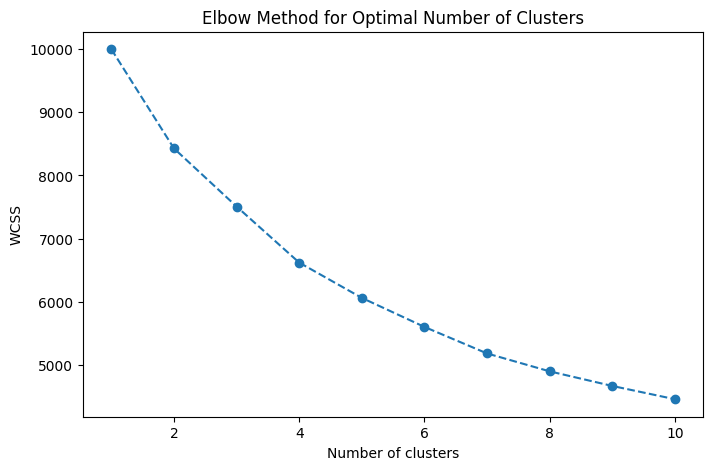

In [60]:
# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)
    # Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [61]:
# From the result we can go with 3 or 4 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

Cluster Centers:
[[4.56910112e+01 1.27427796e+05 7.72879213e+01 4.31601124e+00
  3.82022472e+00]
 [5.60781476e+01 1.30724605e+05 2.81085384e+01 4.43415340e+00
  5.29522431e+00]
 [4.46197655e+01 6.76789782e+04 4.60184255e+01 2.34505863e+00
  3.05862647e+00]]


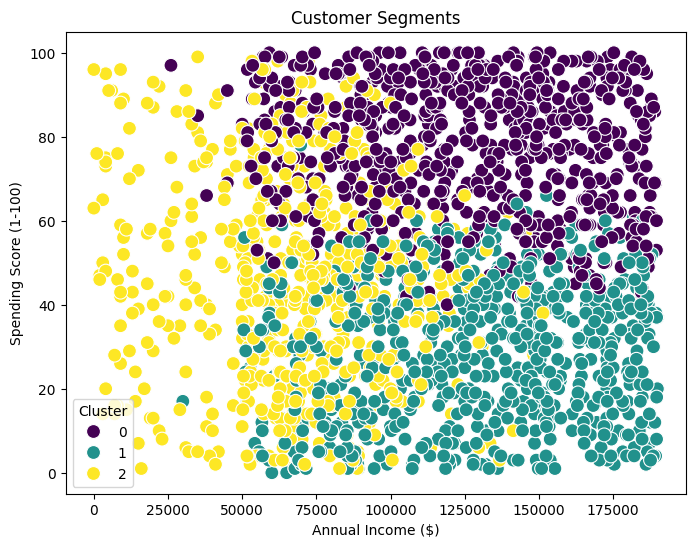

In [62]:
# Display cluster centers
print("Cluster Centers:")
print(scaler.inverse_transform(kmeans.cluster_centers_))

# Visualize clusters (optional, 2D projection for simplicity)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Annual Income ($)'], y=data['Spending Score (1-100)'], hue=data['Cluster'], palette='viridis', s=100)
plt.title('Customer Segments')
plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

In [ ]:
#After Testing 3 and 4 clusters the 3 cluster makes MUCH more sense so we'll go with 3.

In [63]:

numeric_columns = ['Gender','Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Family Size', 'Work Experience']
cluster_summary = data.groupby('Cluster')[numeric_columns].mean()
print(cluster_summary)


           Gender        Age  Annual Income ($)  Spending Score (1-100)  \
Cluster                                                                   
0        0.393812  45.620253      127402.438819               77.316456   
1        0.434153  56.078148      130724.604920               28.108538   
2        0.391304  44.705686       67809.041806               46.036789   

         Family Size  Work Experience  
Cluster                                
0           4.320675         3.822785  
1           4.434153         5.295224  
2           2.342809         3.056856  


In [ ]:
#I did remove the Gender from the clustering because it was creating too much noise and made the cluster less usefull on a buisness perspective.

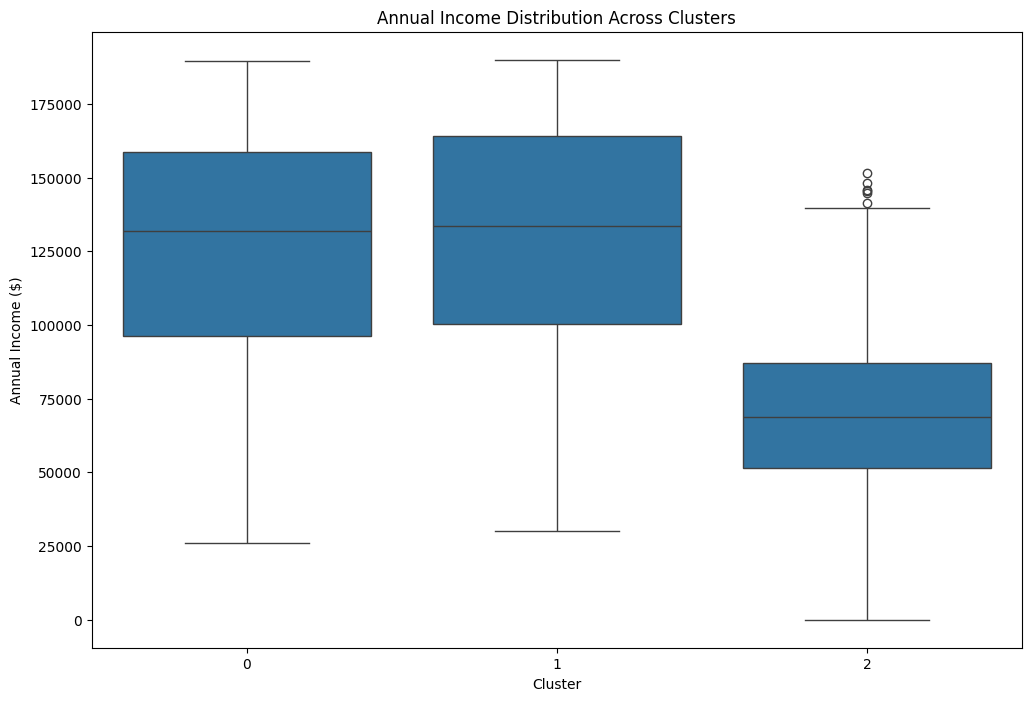

In [64]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Cluster', y='Annual Income ($)', data=data)
plt.title('Annual Income Distribution Across Clusters')
plt.show()

In [67]:
# 0: "Middle-aged, high-income, high-spending individuals with larger families and moderate work experience.",
# 1: "Older, very high-income, low-spending individuals with large families and higher work experience.",
# 2: "Younger, lower-income, moderate-spending individuals with smaller families and lower work experience."


In [68]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(data_scaled, kmeans.labels_)
print("Silhouette Score: ", silhouette_avg)

#Which is not a verygood result at this step I would try to re-run it with more or less cluster and different informations

Silhouette Score:  0.13831704439770814
